# 1. Library Imports

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")



### EDA
1. Load the Titanic dataset using `Seaborn`.
2. Display the first few rows.
3. Save the dataset as a CSV file named `titanic_dataset.csv`.
4. Gender Analysis
5. Percentage Difference
6. Survival Analysis
> We examine the survival rates by gender and class:

In [2]:
# Load Titanic dataset
df = sns.load_dataset("titanic")
print(df.head())

df.to_csv("titanic_dataset.csv", index=False)

# Extra EDA to analyze male or female
print(df["sex"].value_counts())
male = 577
female = 314


perecentage_male = male / (male + female)*100
percentage_female = female/(female + male) * 100
print(f"Percentage of males: {perecentage_male:.2f}%")
print(f"Percentage of woman:{percentage_female:.2f}%")
percentage_difference = (male - female )*100/ female
print(f"Percentage difference between males and females: {percentage_difference:.2f}%")

survival = df.groupby(["sex", "class"])["survived"].value_counts()
tax = df.groupby(["who", "pclass"])["fare"].mean()

print(f"Genders that belong to different class survived  : {survival}")
print()
print(f"genders category about tax that belong to different class : {tax}")


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
sex
male      577
female    314
Name: count, dtype: int64
Percentage of males: 64.76%
Percentage of woman:35.24%
Percentage difference between males and females: 83.76%
Genders that belong to different class survived  :

# 2. Data Preprocessing
##### Part 1 ---> visualize null values

deck           77.2166
age            19.8653
embarked        0.2245
embark_town     0.2245
sex             0.0000
pclass          0.0000
survived        0.0000
fare            0.0000
parch           0.0000
sibsp           0.0000
class           0.0000
adult_male      0.0000
who             0.0000
alive           0.0000
alone           0.0000
dtype: float64


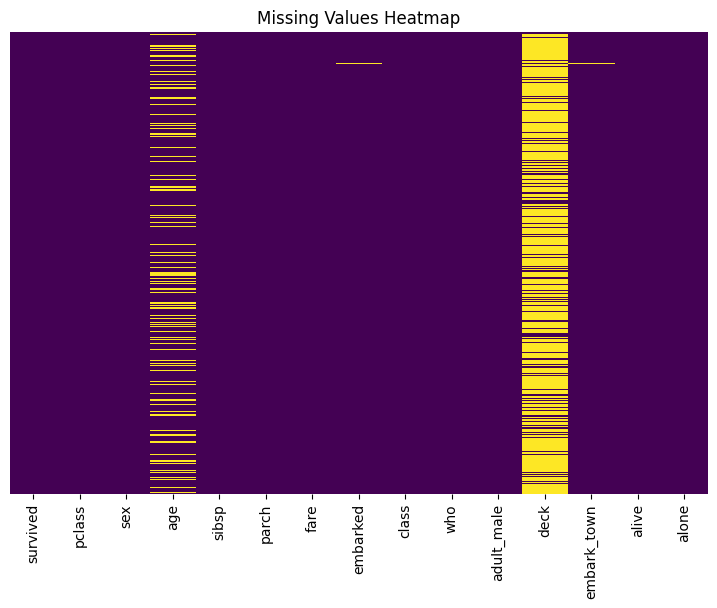

In [3]:
# Part 1: Checking for Missing Values and Visualizing with Heatmap
# Check for missing values
null_values = round(df.isnull().sum() / len(df) * 100, 4).sort_values(ascending=False)  
print(null_values)  

plt.figure(figsize=(9, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


#### Part 2 ---> Handling missing values
1. Dropping 'deck' because it has more than 70% missing values
2. Filling missing values with mean or mode for other columns with < 30% missing values
3. dropping deck column as it is not useful for analysis

In [4]:
df = df.drop('deck', axis=1)
df.head()

# Filling missing values in age column with mean of age column

mean = df["age"].mean
df["age"] = df["age"].fillna(mean)

# Filling missing values in embarked column with mode of embarked column

mode1 = df["embark_town"].mode()[0]
mode2 = df["embarked"].mode()[0]

df["embark_town"] = df["embark_town"].fillna(mode1)
df["embarked"]  = df["embarked"].fillna(mode2)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    object  
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(6)
memory usage: 79.4+ KB
None


# 3. Feature Engineering and Encoding

In [5]:

# Initialize encoders and scalers
scale = StandardScaler()
label = LabelEncoder()
imputer = SimpleImputer(strategy="mean")

# Encode the 'sex' column (0 for female, 1 for male)
df["sex"] = label.fit_transform(df["sex"])
df["embarked"] = label.fit_transform(df["embarked"])

# Encoding 'alone' column (1 for alone, 0 for not alone)
df["alone"] = label.fit_transform(df["alone"])

# Replace labels for 'who' column (man = 1, woman = 0, child = 10)
labels = {"man": 1, "woman": 0, "child": 10}
df["who"] = df["who"].replace(labels)

# Define feature matrix X and target variable y
X = df[["sex","survived", "sibsp","fare", "parch", "alone","embarked"]]
df["fare"] = StandardScaler().fit_transform(df[["fare"]])

print("Data Types:")
print(X.dtypes)
print("First Few Rows:")
print(X.head())

# Handle missing values using SimpleImputer
X = imputer.fit_transform(X)  

# Convert X back to a DataFrame
X = pd.DataFrame(X, columns=["sex", "survived", "sibsp", "fare","parch", "alone","embarked"])

# Scale the feature matrix
X = pd.DataFrame(scale.fit_transform(X), columns=["sex", "survived", "sibsp", "fare","parch", "alone","embarked"])

# Define target variable
y = df["pclass"]


print("Scaled Feature Matrix (First Few Rows):")
print(X.head())
print("Missing Values in X:")
print(X.isnull().sum())


Data Types:
sex           int64
survived      int64
sibsp         int64
fare        float64
parch         int64
alone         int64
embarked      int64
dtype: object
First Few Rows:
   sex  survived  sibsp     fare  parch  alone  embarked
0    1         0      1   7.2500      0      0         2
1    0         1      1  71.2833      0      0         0
2    0         1      0   7.9250      0      1         2
3    0         1      1  53.1000      0      0         2
4    1         0      0   8.0500      0      1         2
Scaled Feature Matrix (First Few Rows):
        sex  survived     sibsp      fare     parch     alone  embarked
0  0.737695 -0.789272  0.432793 -0.502445 -0.473674 -1.231645  0.585954
1 -1.355574  1.266990  0.432793  0.786845 -0.473674 -1.231645 -1.942303
2 -1.355574  1.266990 -0.474545 -0.488854 -0.473674  0.811922  0.585954
3 -1.355574  1.266990  0.432793  0.420730 -0.473674 -1.231645  0.585954
4  0.737695 -0.789272 -0.474545 -0.486337 -0.473674  0.811922  0.585954
Miss

# 4. Train-Test Split

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Model Training and Evaluation

In [7]:

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

model_names = [
    "Logistic Regression",
    "Decision Tree",
    "K Neighbors Classifier",
]

model_score = []

# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_score.append([name, accuracy])

# Sort models by accuracy
sorted_model = sorted(model_score, key=lambda x: x[1], reverse=True)

# Print accuracy scores
for model in sorted_model:
    print(f"Accuracy score: {model[0]} : {model[1]:.3f}")


Accuracy score: Decision Tree : 0.939
Accuracy score: K Neighbors Classifier : 0.883
Accuracy score: Logistic Regression : 0.827


# 6. Model Performance Visualization

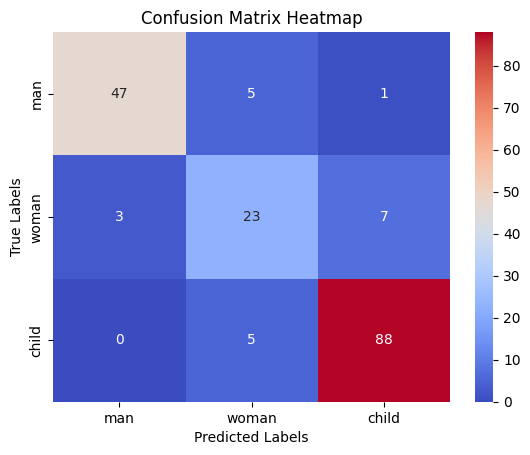

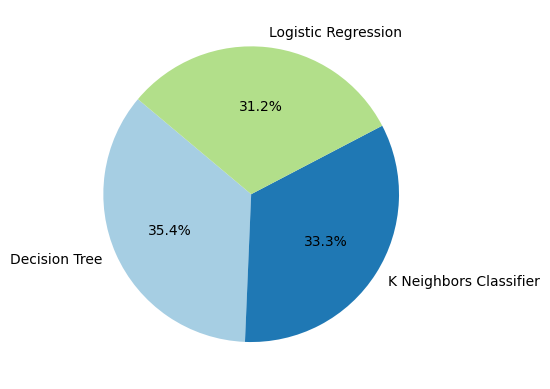

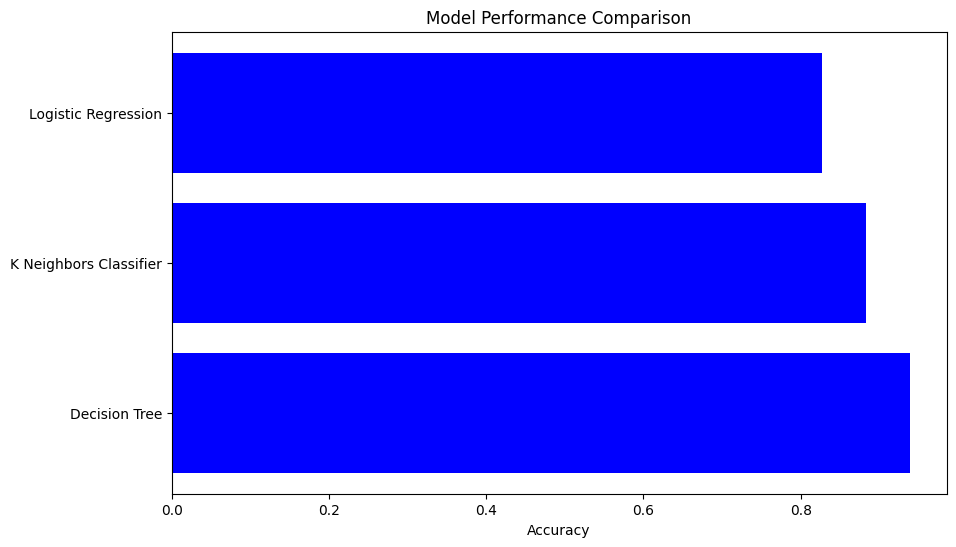

In [8]:

# Plot the model accuracies
model_names_sorted = [model[0] for model in sorted_model]
accuracies_sorted = [model[1] for model in sorted_model]

confuse = confusion_matrix(y_test,y_pred)
sns.heatmap(confuse, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

plt.pie(accuracies_sorted, labels=model_names_sorted, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(accuracies_sorted))), startangle=140)

plt.figure(figsize=(10, 6))
plt.barh(model_names_sorted, accuracies_sorted, color='blue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 2, 4]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize models for optimization
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Initialize result tracking
optimized_scores = []

# Hyperparameter tuning and evaluation
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    
    # Grid Search
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    grid_best = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate GridSearch best model
    grid_pred = grid_best.predict(X_test)
    grid_accuracy = accuracy_score(y_test, grid_pred)
    grid_recall = recall_score(y_test, grid_pred, average='macro')
    grid_precision = precision_score(y_test, grid_pred, average='macro')
    grid_f1 = f1_score(y_test, grid_pred, average='macro')

    # Store results
    optimized_scores.append({
        'Model': model_name,
        'Accuracy': grid_accuracy,
        'Recall': grid_recall,
        'Precision': grid_precision,
        'F1 Score': grid_f1,
        'Best Parameters': best_params
    })

# Convert results to a DataFrame for better readability
optimized_scores_df = pd.DataFrame(optimized_scores)
print(optimized_scores_df)


Optimizing Logistic Regression...
Optimizing Decision Tree...
Optimizing KNN...
                 Model  Accuracy    Recall  Precision  F1 Score  \
0  Logistic Regression  0.843575  0.737829   0.853624  0.747196   
1        Decision Tree  0.938547  0.923686   0.917766  0.919926   
2                  KNN  0.910615  0.878099   0.904497  0.889146   

                                     Best Parameters  
0  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}  
1  {'max_depth': None, 'min_samples_leaf': 1, 'mi...  
2  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  


### Extra work logistic regression

In [10]:
label = LabelEncoder()
df["embarked"] = label.fit_transform(df["embarked"])
X1 = df[["pclass","sibsp","alone","fare","survived","embarked"]]
y1 = df["sex"]
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_pred1 = logistic.predict(X_test)
accuracy_score = accuracy_score(y_test,y_pred1)
accuracy_score



0.8044692737430168